<a href="https://colab.research.google.com/github/Asifpatan05/Devtern/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Fixed the typo here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/spam_ham_dataset.csv', encoding='latin-1')

In [19]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [20]:
# Assuming the column containing the text data is named 'text' and the label column is named 'label'
x = data['text']
y = data['label']

In [21]:
y = y.map({'spam' : 1, 'ham':0})

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [24]:
rf_classifer = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifer.fit(x_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf_classifer.predict(x_test_tfidf)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Now precision_score is defined
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [27]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"ROC AUC score: {roc_auc_score}") # Use the correct variable name here

Accuracy: 0.978743961352657
Precision: 0.9562289562289562
Recall: 0.9692832764505119
F1 score: 0.9627118644067797
ROC AUC score: 0.9758815304085444


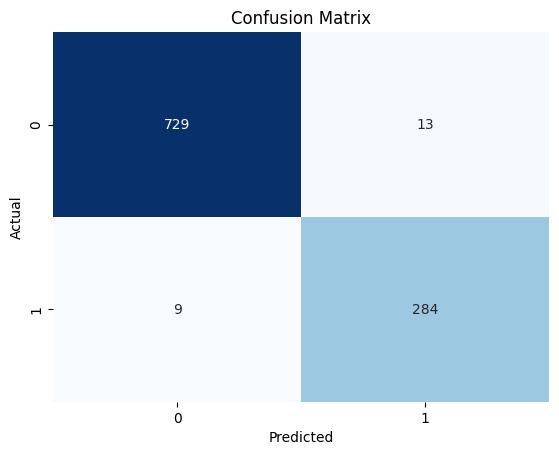

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()